In [1]:
# Import necessary libraries
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

In [2]:
# Open the groceries.csv file in read mode ('r') because the rows dont have the same number of columns, it isnt a normal csv file
with open("Market_Basket_Optimisation.csv", 'r') as file:
    
    # Read the file line by line, strip any leading/trailing whitespace, 
    # and split each line by commas to create a list of items (i.e., a transaction)
    df = [line.strip().split(',') for line in file]

# Display the first five transactions (each transaction is a list of items)
for transaction in df[:5]:
    print(transaction)

['shrimp', 'almonds', 'avocado', 'vegetables mix', 'green grapes', 'whole weat flour', 'yams', 'cottage cheese', 'energy drink', 'tomato juice', 'low fat yogurt', 'green tea', 'honey', 'salad', 'mineral water', 'salmon', 'antioxydant juice', 'frozen smoothie', 'spinach', 'olive oil']
['burgers', 'meatballs', 'eggs']
['chutney']
['turkey', 'avocado']
['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea']


In [4]:
# Create a one-hot encoded DataFrame for the items
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_data = te.fit(df).transform(df)

df = pd.DataFrame(te_data, columns=te.columns_)

df

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Apply the Apriori Algorithm to find Frequent Itemsets

In [5]:
# Set a minimum support value to find frequent itemsets that appear in at least 1% of transactions
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)

# Display the frequent itemsets found
frequent_itemsets.head() 

,support,itemsets
0,0.020397,(almonds)
1,0.033329,(avocado)
2,0.010799,(barbecue sauce)
3,0.014265,(black tea)
4,0.011465,(body spray)


In [6]:
frequent_itemsets.shape

(257, 2)

In [9]:
frequent_itemsets.sort_values(by='support', ascending=False)

,support,itemsets
46,0.238368,(mineral water)
19,0.179709,(eggs)
63,0.174110,(spaghetti)
24,0.170911,(french fries)
13,0.163845,(chocolate)
...,...,...
255,0.010265,"(olive oil, spaghetti, mineral water)"
123,0.010132,"(chocolate, soup)"
246,0.010132,"(ground beef, mineral water, eggs)"
249,0.010132,"(french fries, spaghetti, mineral water)"


### Generate Association Rules

In [10]:
# Now we will use the frequent itemsets to generate association rules.
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Display the first few association rules
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(avocado),(mineral water),0.033329,0.238368,0.011598,0.348000,1.459926,1.0,0.003654,1.168147,0.325896,0.044593,0.143943,0.198329
1,(mineral water),(avocado),0.238368,0.033329,0.011598,0.048658,1.459926,1.0,0.003654,1.016113,0.413630,0.044593,0.015857,0.198329
2,(cake),(burgers),0.081056,0.087188,0.011465,0.141447,1.622319,1.0,0.004398,1.063198,0.417434,0.073129,0.059442,0.136473
3,(burgers),(cake),0.087188,0.081056,0.011465,0.131498,1.622319,1.0,0.004398,1.058080,0.420238,0.073129,0.054892,0.136473
4,(chocolate),(burgers),0.163845,0.087188,0.017064,0.104150,1.194537,1.0,0.002779,1.018933,0.194767,0.072934,0.018581,0.149934


In [11]:
rules.tail()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
401,"(mineral water, pancakes)",(spaghetti),0.033729,0.174110,0.011465,0.339921,1.952333,1.0,0.005593,1.251198,0.504819,0.058384,0.200766,0.202885
402,"(spaghetti, mineral water)",(pancakes),0.059725,0.095054,0.011465,0.191964,2.019529,1.0,0.005788,1.119933,0.536902,0.080000,0.107090,0.156291
403,(pancakes),"(spaghetti, mineral water)",0.095054,0.059725,0.011465,0.120617,2.019529,1.0,0.005788,1.069244,0.557862,0.080000,0.064760,0.156291
404,(spaghetti),"(mineral water, pancakes)",0.174110,0.033729,0.011465,0.065850,1.952333,1.0,0.005593,1.034385,0.590626,0.058384,0.033242,0.202885
405,(mineral water),"(spaghetti, pancakes)",0.238368,0.025197,0.011465,0.048098,1.908923,1.0,0.005459,1.024059,0.625163,0.045479,0.023494,0.251562


In [12]:
rules['lift'].unique

<bound method Series.unique of 0      1.459926
1      1.459926
2      1.622319
3      1.622319
4      1.194537
         ...   
401    1.952333
402    2.019529
403    2.019529
404    1.952333
405    1.908923
Name: lift, Length: 406, dtype: float64>

Filter and Sort Rules

In [16]:
# We can filter the rules to focus on those with high confidence or lift values.
strong_rules = rules[(rules['lift'] > 1.2) & (rules['confidence'] > 0.5)]

# Sort the rules by lift, in descending order
strong_rules = strong_rules.sort_values(by='lift', ascending=False)

# Display the filtered rules
strong_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
343,"(ground beef, eggs)",(mineral water),0.019997,0.238368,0.010132,0.506667,2.125563,1.0,0.005365,1.543848,0.540342,0.040816,0.352268,0.274586
376,"(milk, ground beef)",(mineral water),0.021997,0.238368,0.011065,0.503030,2.110308,1.0,0.005822,1.532552,0.537969,0.044385,0.347493,0.274725


Visualizing Result

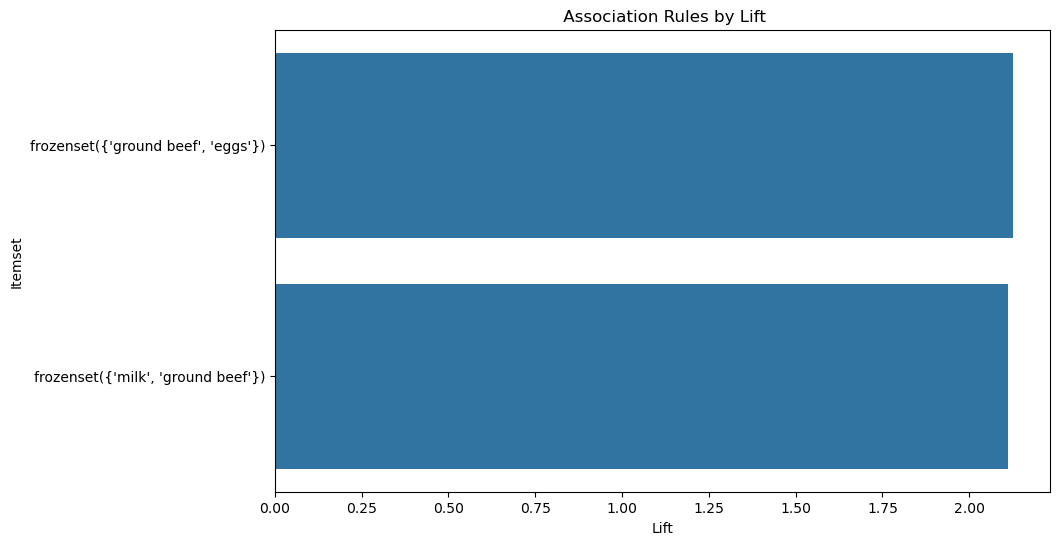

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the top 10 rules based on lift
plt.figure(figsize=(10, 6))
sns.barplot(x=strong_rules['lift'].head(2), y=strong_rules['antecedents'].head(10).astype(str))
plt.title(' Association Rules by Lift')
plt.xlabel('Lift')
plt.ylabel('Itemset')
plt.show()

The analysis revealed that:

Ground Beef & Eggs → Mineral Water
Confidence: 50.67%
Lift: 2.13
Interpretation: Customers who buy ground beef and eggs are twice as likely to purchase mineral water compared to random shoppers.

Milk & Ground Beef → Mineral Water
Confidence: 50.30%
Lift: 2.11
Interpretation: Customers who buy milk and ground beef also have a strong likelihood of buying mineral water.

These insights indicate a strong purchasing relationship between fresh food items and mineral water.

###Business Strategy Based on Findings
 A. Cross-Promotions & Bundling
Bundle Offers:
"Buy Ground Beef & Eggs, Get 10% Off Mineral Water."
"Purchase Milk & Ground Beef, Get a Free Small Bottle of Mineral Water."

B. Strategic Product Placement
Shelf Arrangement:
Place mineral water near the meat and dairy sections to encourage impulse purchases.
Checkout Promotions:
Display discounted mineral water at checkout when customers buy ground beef, eggs, or milk.

